### Student Information
Name: Arthur Winqwist   

Student ID: A14546203

GitHub ID: ArthurGII

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas.
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__.

### Second Phase Submission

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__.

# Phase 1

In [445]:
# test code for environment setup
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt')
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
import matplotlib.pyplot as plt
%matplotlib inline

# Load Reddit data instead of 20newsgroups
reddit_data = pd.read_csv(r'c:\Users\arthu\Downloads\Reddit-stock-sentiment (1).csv')

# Create a similar structure to twenty_train for compatibility
class RedditData:
    def __init__(self, df):
        self.data = df['text'].tolist()
        self.target = df['label'].map({1.0: 0, 0.0: 1, -1.0: 2}).tolist()
        self.target_names = ['positive', 'neutral', 'negative']
        self.filenames = [f'reddit_{i}' for i in range(len(df))]

reddit_train = RedditData(reddit_data)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\arthu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


---

## 2. Data Preparation

We will load the Reddit dataset and follow the same process from the Master notebook.

In [446]:
reddit_train.data[0:2]

['Calls on retards',
 'Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.']

reddit_train.target_names

In [447]:
len(reddit_train.data)

847

In [448]:
len(reddit_train.filenames)

847

#### We can also print an example from the subset

In [449]:
# An example of what the subset contains
print("\n".join(reddit_train.data[0].split("\n")))

Calls on retards


... and determine the label of the example via `target_names` key value

In [450]:
print(reddit_train.target_names[reddit_train.target[0]])

negative


In [451]:
reddit_train.target[0]

2

... we can also get the category of 10 documents via `target` key value

In [452]:
# category of first 10 documents.
reddit_train.target[0:10]

[2, 1, 1, 0, 2, 1, 2, 1, 0, 0]

In [453]:
for t in reddit_train.target[:10]:
    print(reddit_train.target_names[t])

negative
neutral
neutral
positive
negative
neutral
negative
neutral
positive
positive


---

### **>>> Exercise 1 :**  


In [454]:
# Answer here
for i in range(3):
    print(f"example {i+1}")
    print("\n".join(reddit_train.data[i].split("\n")))

example 1
Calls on retards
example 2
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.
example 3
Seeing lots of red in the ticker.


---

## 3. Data Transformation

### 3.1 Converting Dictionary into Pandas Dataframe

In [455]:
# Helper functions
def format_rows(data_object):
    return [{'text': text} for text in data_object.data]

def format_labels(label_index, data_object):
    return data_object.target_names[label_index]

def check_missing_values(series):
    missing_count = series.sum()
    total_count = len(series)
    return f"Missing values: {missing_count} out of {total_count}"

def tokenize_text(text):
    tokens = nltk.word_tokenize(text.lower())
    return tokens

# construct dataframe from a list
X = pd.DataFrame.from_records(format_rows(reddit_train), columns=['text'])

In [456]:
# add category to the dataframe
X['category'] = reddit_train.target

In [457]:
# add category label also
X['category_name'] = X.category.apply(lambda t: format_labels(t, reddit_train))

In [458]:
X[0:10]

,text,category,category_name
0,Calls on retards,2,negative
1,Stunt as in like why did they even make a big ...,1,neutral
2,Seeing lots of red in the ticker.,1,neutral
3,Vision Marine Technologies Inc. is rewriting t...,0,positive
4,He didn’t say thank you.,2,negative
5,"Hoping to ejaculate in wet warm puss tonight, ...",1,neutral
6,Trump will respond to china increasing their t...,2,negative
7,Confirmed not a trap. Its been like this for p...,1,neutral
8,Am I the only one seeing the cup & handle brea...,0,positive
9,HLGN is $10. Hurry and catch it now before it ...,0,positive


### **>>> Exercise 2:**
Experiment with other querying techniques using pandas dataframes.

In [459]:
# Boolean indexing
# Select rows where category_name is "positive"
X[X["category_name"] == "positive"]

,text,category,category_name
3,Vision Marine Technologies Inc. is rewriting t...,0,positive
8,Am I the only one seeing the cup & handle brea...,0,positive
9,HLGN is $10. Hurry and catch it now before it ...,0,positive
34,So they went from saying redditors are bad for...,0,positive
38,"Hey our net worth match now, we can be friends!",0,positive
...,...,...,...
830,powell already said inflations from tariffs is...,0,positive
831,Things will get better soon. Once those 9 tran...,0,positive
832,NICE. Cannot complain.,0,positive
841,So countries “begging to stop the tariffs” and...,0,positive


---

### **>>> Exercise 3:**  
Try to fetch records belonging to the ```positive``` category, and query every 10th record. Only show the first 5 records.

In [460]:
X[X["category_name"]=="positive"][::10][0:5]

,text,category,category_name
3,Vision Marine Technologies Inc. is rewriting t...,0,positive
78,I think it’s gonna work itself out. I bought t...,0,positive
168,The obvious can also be refreshing from CNBC: ...,0,positive
219,Same. Back to break even after that last rip b...,0,positive
319,Etrade has a feed of news articles about how r...,0,positive


---

## 4. Data Mining using Pandas

### 4.1 Missing Values

In [461]:
# check missing values
X.isnull()

,text,category,category_name
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
842,False,False,False
843,False,False,False
844,False,False,False
845,False,False,False


In [462]:
X.isnull().apply(lambda x: check_missing_values(x))

text             Missing values: 0 out of 847
category         Missing values: 0 out of 847
category_name    Missing values: 0 out of 847
dtype: object

### >>> **Exercise 4:**
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.

In [463]:
# Answer here
X.isnull().apply(lambda x: check_missing_values(x), axis=1)

0      Missing values: 0 out of 3
1      Missing values: 0 out of 3
2      Missing values: 0 out of 3
3      Missing values: 0 out of 3
4      Missing values: 0 out of 3
                  ...            
842    Missing values: 0 out of 3
843    Missing values: 0 out of 3
844    Missing values: 0 out of 3
845    Missing values: 0 out of 3
846    Missing values: 0 out of 3
Length: 847, dtype: object

In [464]:
dummy_series = pd.Series(["dummy_record", 1], index=["text", "category"])

In [465]:
dummy_series

text        dummy_record
category               1
dtype: object

In [466]:
dummy_series.to_frame().T

,text,category
0,dummy_record,1


In [467]:
result_with_series = pd.concat([X, dummy_series.to_frame().T], ignore_index=True)

In [468]:
# check if the records was commited into result
len(result_with_series)

848

In [469]:
result_with_series.isnull().apply(lambda x: check_missing_values(x))

text             Missing values: 0 out of 848
category         Missing values: 0 out of 848
category_name    Missing values: 1 out of 848
dtype: object

In [470]:
# dummy record as dictionary format
dummy_dict = [{'text': 'dummy_record',
               'category': 1
              }]

In [471]:
X = pd.concat([X, pd.DataFrame(dummy_dict)], ignore_index=True)

In [473]:
X.isnull().apply(lambda x: check_missing_values(x))

text             Missing values: 0 out of 848
category         Missing values: 0 out of 848
category_name    Missing values: 1 out of 848
dtype: object

In [474]:
X.dropna(inplace=True)

In [475]:
X.isnull().apply(lambda x: check_missing_values(x))

text             Missing values: 0 out of 847
category         Missing values: 0 out of 847
category_name    Missing values: 0 out of 847
dtype: object

### >>> **Exercise 5:**
There is an old saying that goes, "The devil is in the details." Let's focus on a different method to check for missing values.

In [477]:
NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [478]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [479]:
# Answer here
# .isnull() didn't work because "NaN" or "None" and ""
# are not nulls but regular texts, this is why they didn't get flagged

---

### 4.2 Dealing with Duplicate Data

In [480]:
X.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
842    False
843    False
844     True
845    False
846    False
Length: 847, dtype: bool

In [481]:
sum(X.duplicated())

23

In [482]:
sum(X.duplicated('text'))

23

In [483]:
dummy_duplicate_dict = [{
                             'text': 'dummy record',
                             'category': 1,
                             'category_name': "dummy category"
                        },
                        {
                             'text': 'dummy record',
                             'category': 1,
                             'category_name': "dummy category"
                        }]

In [484]:
X = pd.concat([X, pd.DataFrame(dummy_duplicate_dict)], ignore_index=True)

In [485]:
len(X)

849

In [486]:
sum(X.duplicated())

24

In [487]:
X.drop_duplicates(keep=False, inplace=True)

In [488]:
len(X)

813

---

## 5. Data Preprocessing

### 5.1 Sampling

In [489]:
X_sample = X.sample(n=500)

In [490]:
len(X_sample)

500

In [491]:
X_sample[0:4]

,text,category,category_name
297,"When you realize it is happening, it will be t...",2,negative
833,LVMH (MC)-31.42%\n\nDisney (DIS)-17.03% \n\nAp...,2,negative
596,Pre-market is all over the place. Are we alrea...,2,negative
233,Clearly 77 million people are ok with this.,1,neutral


### >>> **Exercise 6:**
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they?

In [492]:
# X_sample contains just 500 randomly selected rows from X,
# So it doesn't represent the entire Dataset, The order of rows are also randomized
# The columns remain the same

category_name
neutral     391
negative    315
positive    107
Name: count, dtype: int64


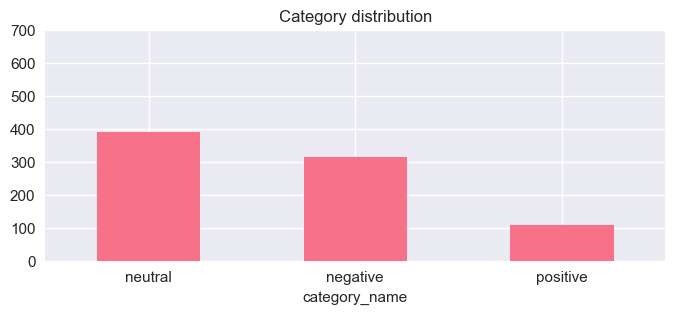

In [493]:
import seaborn as sns

print(X.category_name.value_counts())

# plot barchart for X
X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 700],
                                    rot = 0, fontsize = 11, figsize = (8,3))
plt.show()

category_name
neutral     238
negative    198
positive     64
Name: count, dtype: int64


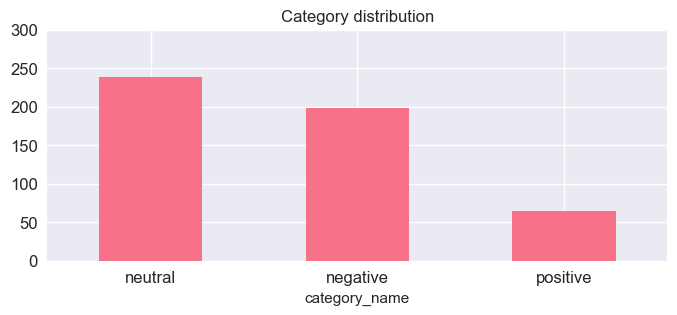

In [494]:
print(X_sample.category_name.value_counts())

# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, 300],
                                           rot = 0, fontsize = 12, figsize = (8,3))
plt.show()

### >>> **Exercise 7:**
Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it?

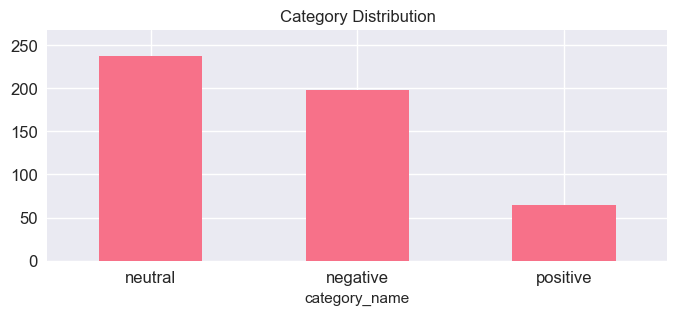

In [495]:
# Answer here
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category Distribution',
                                           ylim = [0, X_sample.category_name.value_counts().max()+30],
                                           rot = 0, fontsize = 12, figsize = (8,3))
plt.show()

### >>> **Exercise 8:**
We can also do a side-by-side comparison of the distribution between the two datasets.

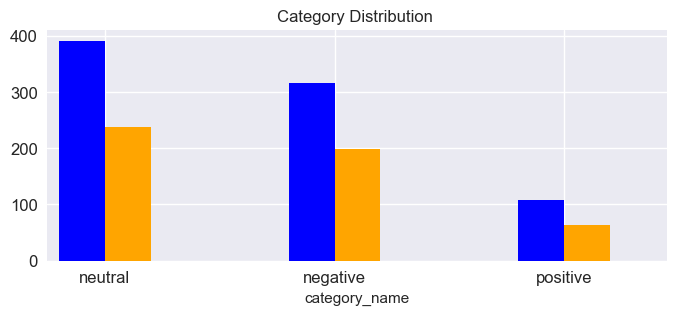

In [496]:
# Answer here
ax = X.category_name.value_counts().plot(kind='bar',
                                         color='blue',
                                         width=0.20,
                                         position=1,
                                         rot=0, fontsize=12, figsize=(8,3),
                                         title='Category Distribution ')

X_sample.category_name.value_counts().plot(kind='bar',
                                           color='orange',
                                           width=0.20,
                                           position=0,
                                           rot=0, fontsize=12, figsize=(8,3),
                                           ax=ax)

plt.show()

---

### 5.2 Feature Creation

In [497]:
nltk.download("punkt")
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\arthu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\arthu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [498]:
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: tokenize_text(x))

In [499]:
X[0:4]["unigrams"]

0                                 [calls, on, retards]
1    [stunt, as, in, like, why, did, they, even, ma...
2          [seeing, lots, of, red, in, the, ticker, .]
3    [vision, marine, technologies, inc., is, rewri...
Name: unigrams, dtype: object

In [500]:
X[0:4]

,text,category,category_name,unigrams
0,Calls on retards,2,negative,"[calls, on, retards]"
1,Stunt as in like why did they even make a big ...,1,neutral,"[stunt, as, in, like, why, did, they, even, ma..."
2,Seeing lots of red in the ticker.,1,neutral,"[seeing, lots, of, red, in, the, ticker, .]"
3,Vision Marine Technologies Inc. is rewriting t...,0,positive,"[vision, marine, technologies, inc., is, rewri..."


In [501]:
list(X[0:1]['unigrams'])

[['calls', 'on', 'retards']]

---

### 5.3 Feature subset selection

In [502]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)
print(X_counts[0])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 3 stored elements and shape (1, 4313)>
  Coords	Values
  (0, 689)	1
  (0, 2682)	1
  (0, 3220)	1


In [503]:
count_vect.get_feature_names_out()[4000]

'understandable'

In [504]:
analyze = count_vect.build_analyzer()
analyze("I am craving for a hawaiian pizza right now")

['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

### **>>> Exercise 11:**
From the chart above, we can see how sparse the term-document matrix is. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it.

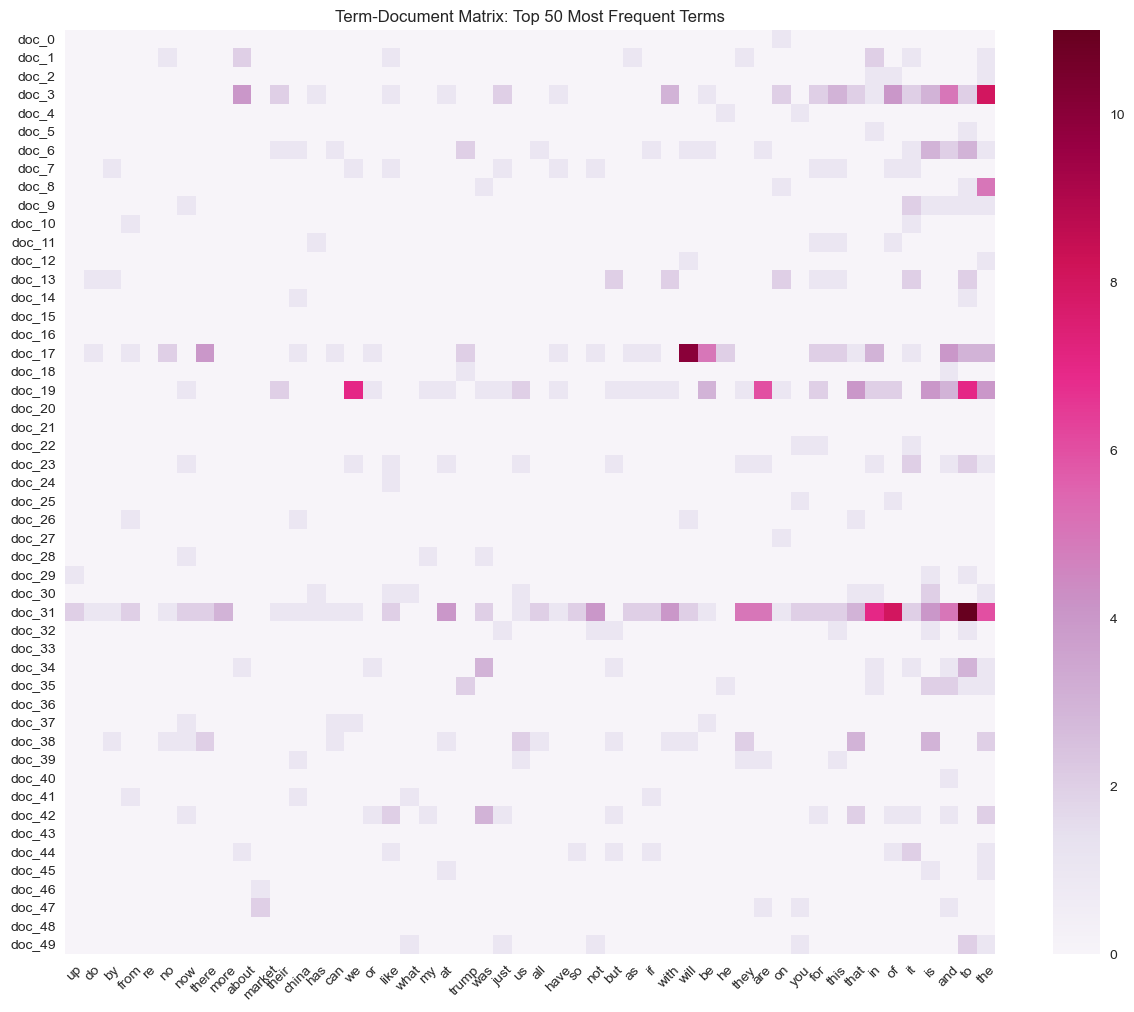

In [505]:
# Answer here
term_frequencies = np.array(X_counts.sum(axis=0))[0]
top_term_indices = np.argsort(term_frequencies)[-50:]  # Top 50 most frequent terms

n_docs_sample = min(50, X_counts.shape[0])
plot_z = X_counts[:n_docs_sample, :][:, top_term_indices].toarray()

plot_x = [count_vect.get_feature_names_out()[i][:8] for i in top_term_indices]  # Truncate long words
plot_y = [f"doc_{i}" for i in range(n_docs_sample)]

df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)
plt.subplots(figsize=(15, 12))  # Larger figure for more data
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=df_todraw.max().max(),  # Dynamic max value
                 annot=False)  # Remove annotations for readability
plt.xticks(rotation=45)
plt.title('Term-Document Matrix: Top 50 Most Frequent Terms')
plt.show()

### 5.4 Attribute Transformation / Aggregation

#### 5.4.1 Transform Text Data

In [506]:
# note this takes time to compute
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [507]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [508]:
term_frequencies[0] #sum of first term

np.int64(4)

In [509]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

### >>> **Exercise 12:**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [510]:
# Answer here
import plotly.express as px
import plotly.graph_objects as go

fig = px.bar(
    x=count_vect.get_feature_names_out()[:300],
    y=term_frequencies[:300],
)

fig.update_layout(
    width=1200,
    height=600,
    xaxis_tickangle=-90,
)

fig.show()

### >>> **Exercise 13:**
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise.

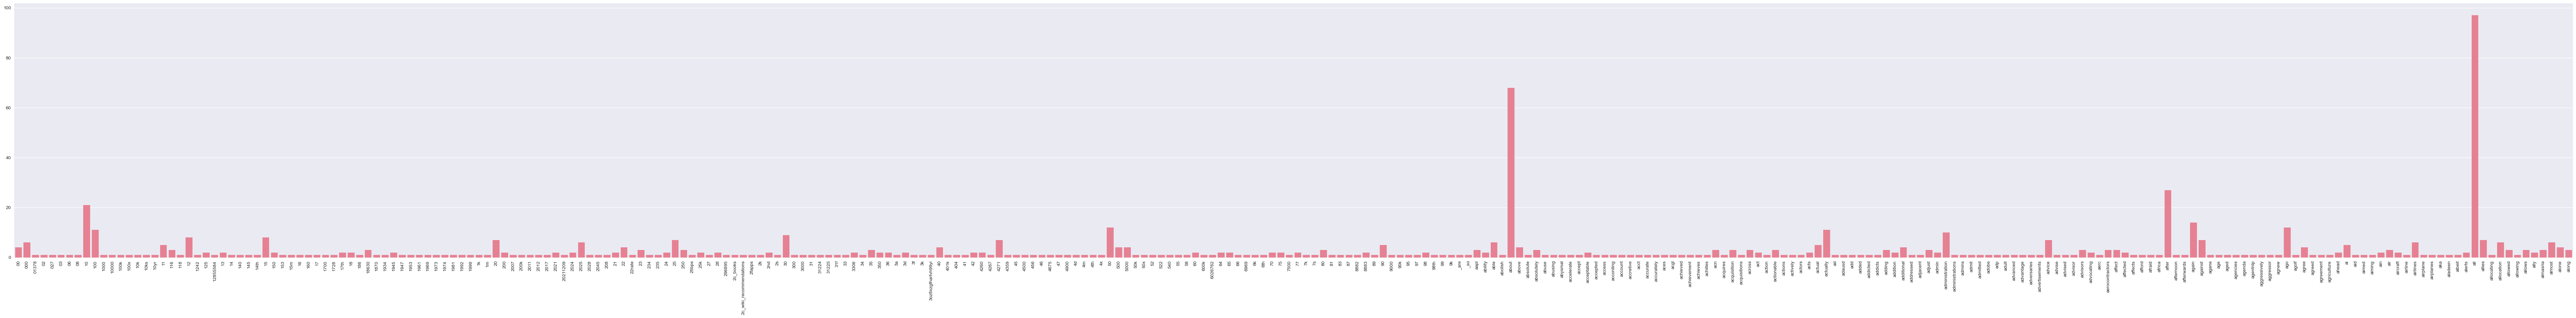

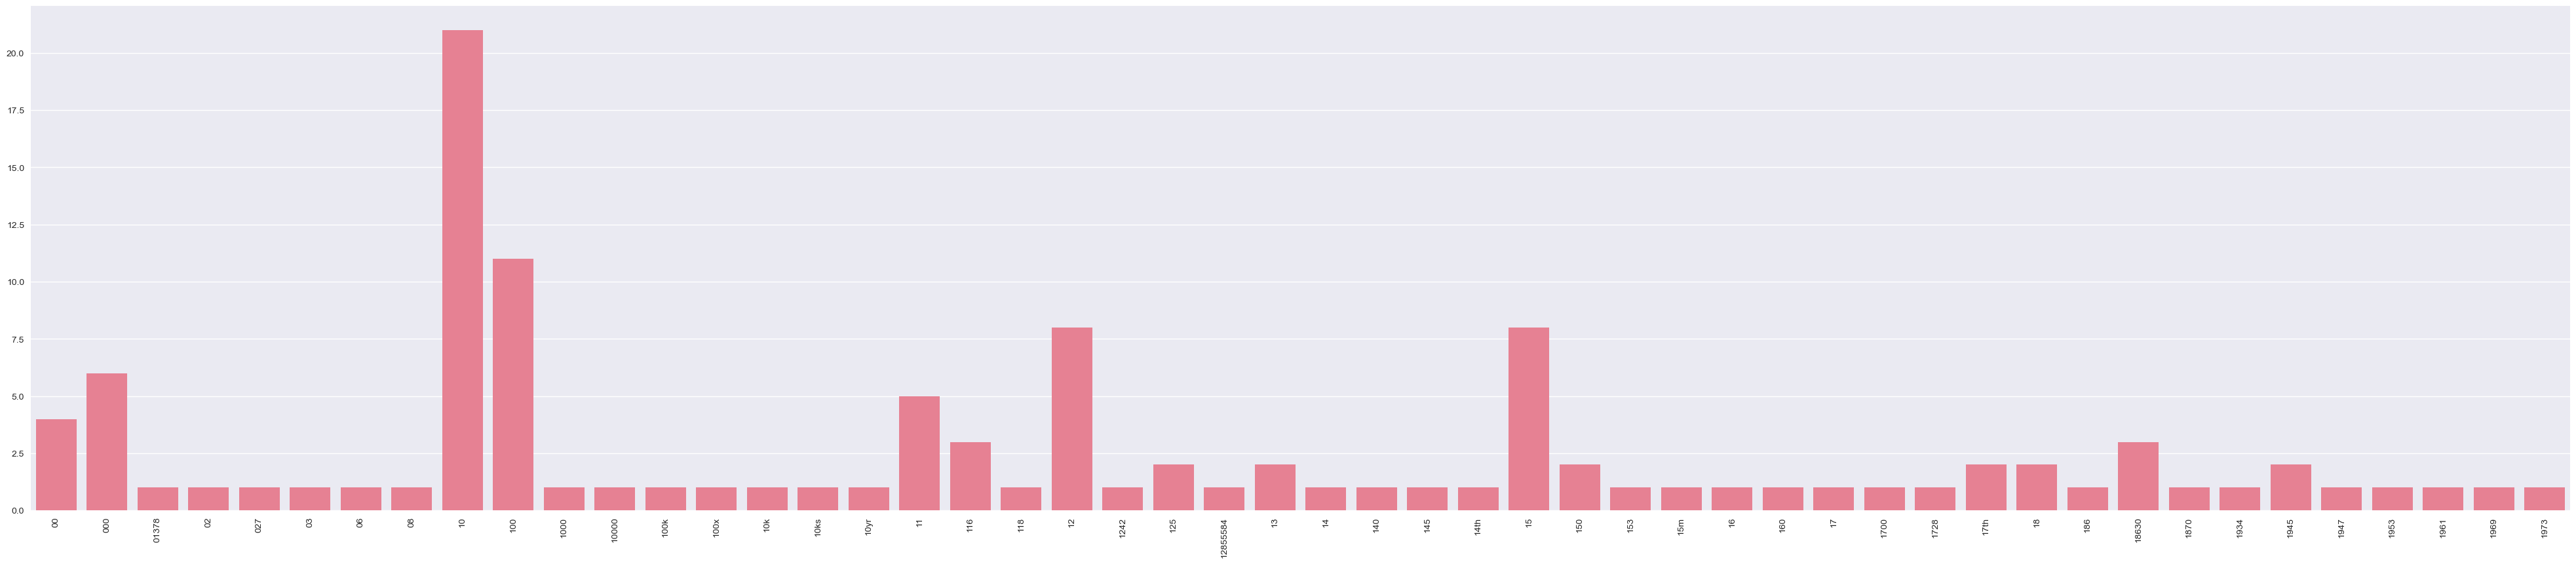

In [511]:
# Answer here
plt.subplots(figsize=(50, 10))  # Reduced width from 100 to 50
g = sns.barplot(x=count_vect.get_feature_names_out()[:50],  # Reduced from 300 to 50
            y=term_frequencies[:50])
g.set_xticklabels(count_vect.get_feature_names_out()[:50], rotation = 90);
plt.show()

### >>> **Exercise 14:**
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order.

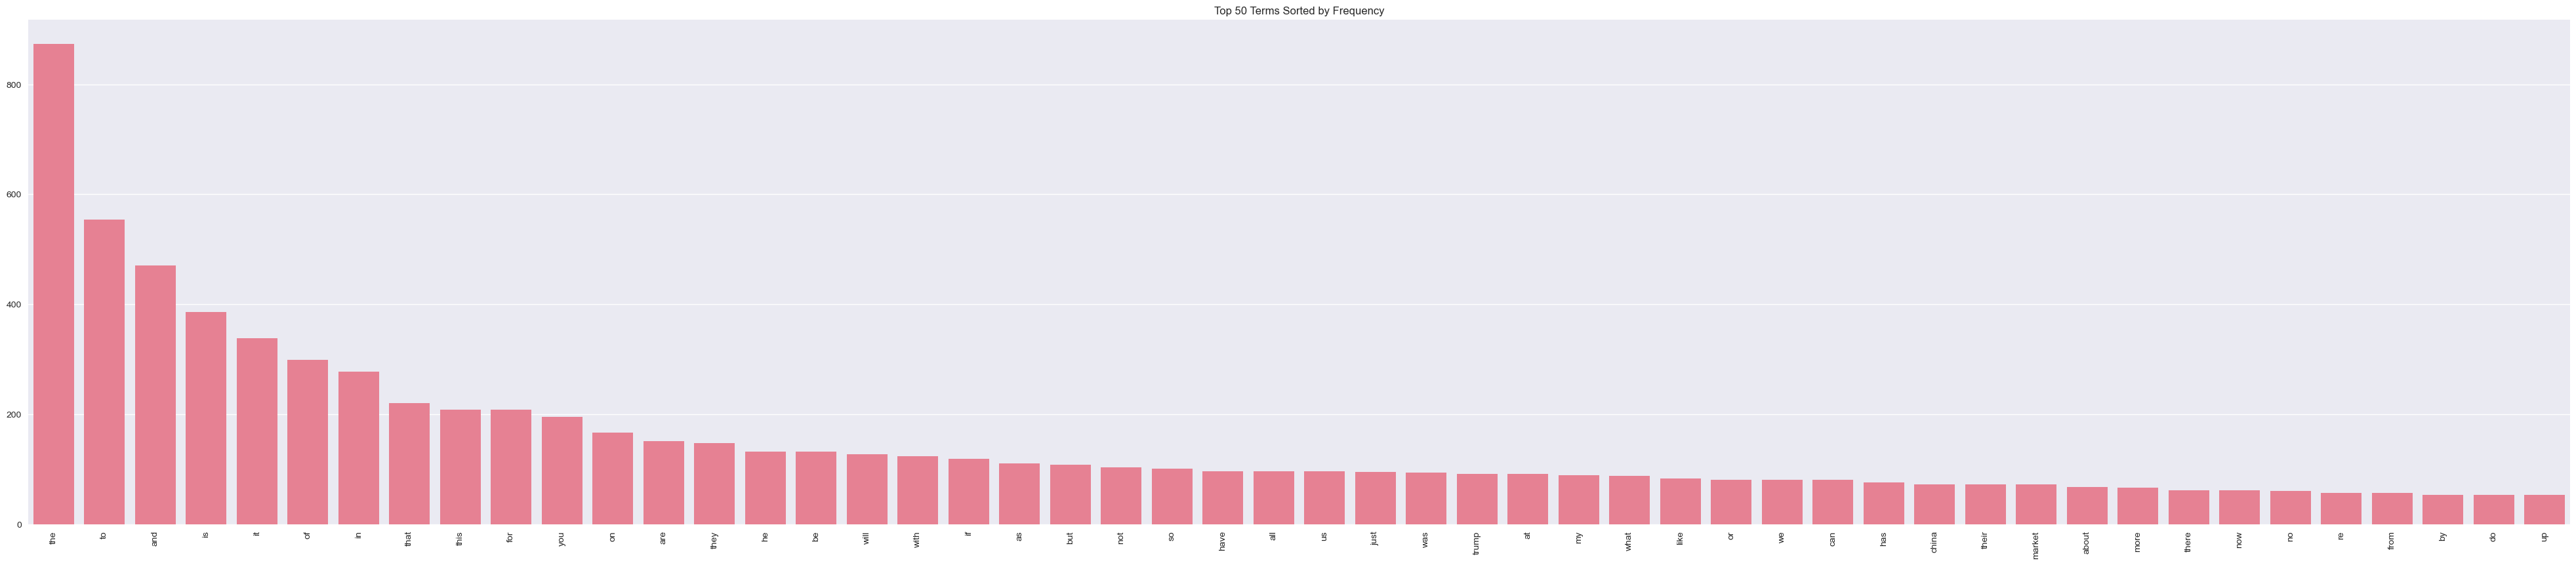

In [512]:
# Answer here
# Sort terms by frequency in descending order
sorted_indices = np.argsort(term_frequencies)[::-1]
sorted_terms = count_vect.get_feature_names_out()[sorted_indices][:50]
sorted_frequencies = term_frequencies[sorted_indices][:50]

plt.subplots(figsize=(50, 10))
g = sns.barplot(x=sorted_terms, y=sorted_frequencies)
g.set_xticklabels(sorted_terms, rotation=90)
plt.title('Top 50 Terms Sorted by Frequency')
plt.show()

In [513]:
term_frequencies_log = [math.log(i) for i in term_frequencies]

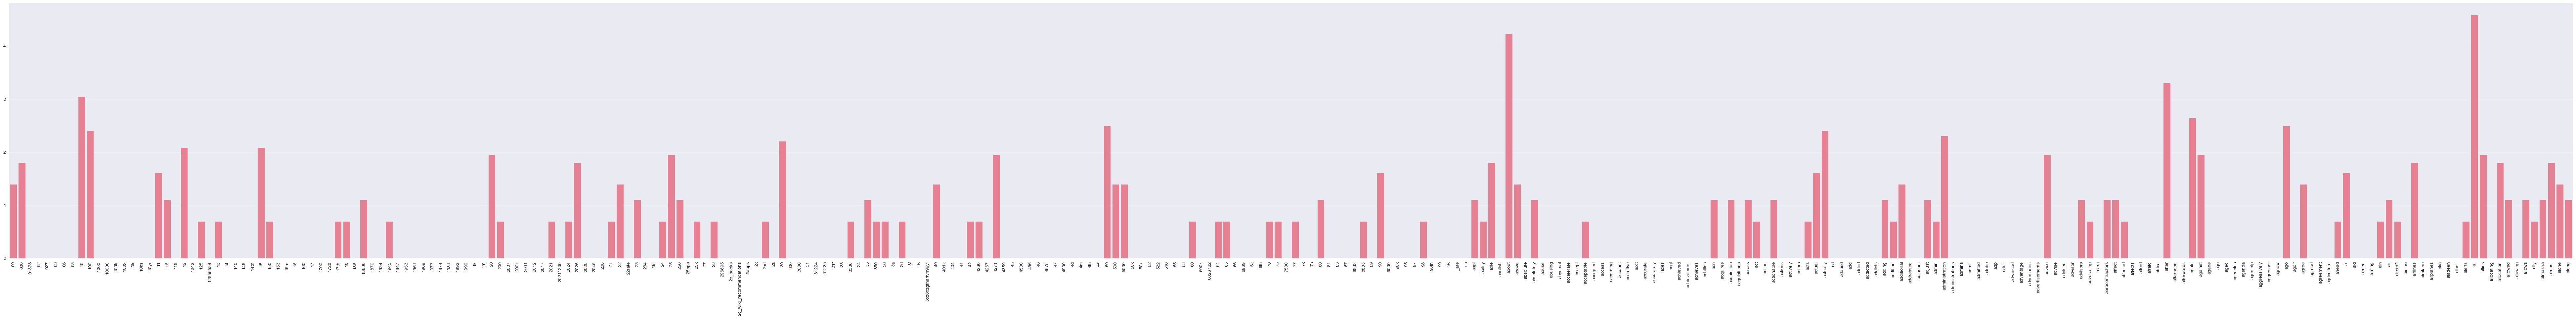

In [514]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);
plt.show()

### >>> **Exercise 15:**
You can copy the code from the previous exercise and change the 'term_frequencies' variable for the 'term_frequencies_log', comment about the differences that you observe.

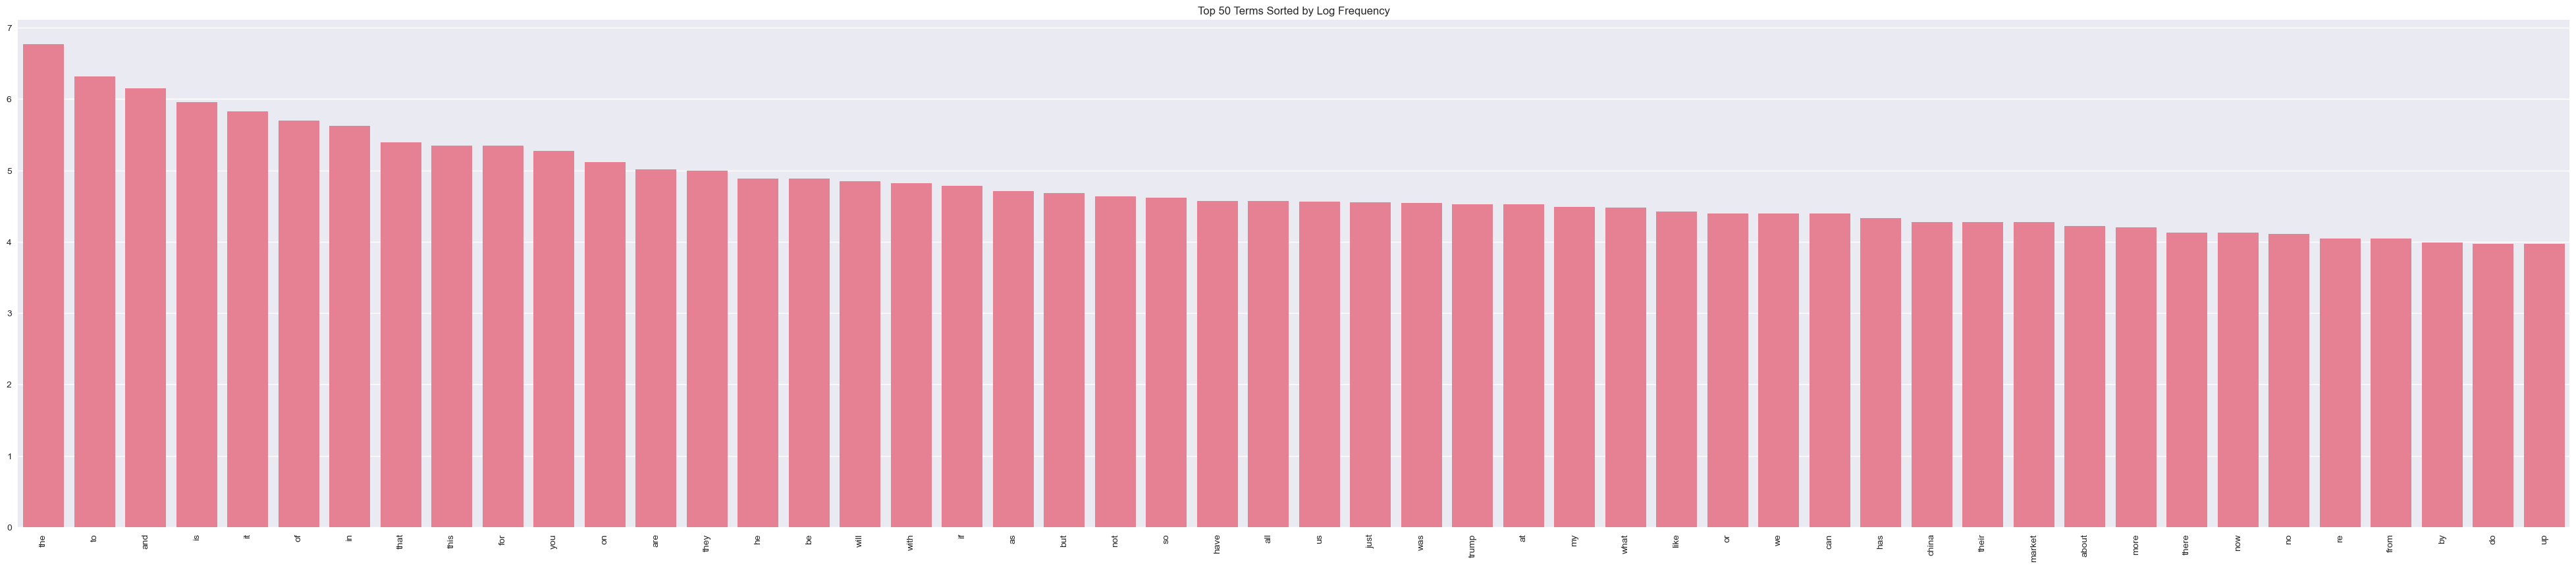

In [515]:
# Answer here
term_frequencies_log = np.array(term_frequencies_log)

sorted_indices = np.argsort(term_frequencies_log)[::-1]
sorted_terms = count_vect.get_feature_names_out()[sorted_indices][:50]
sorted_log_frequencies = term_frequencies_log[sorted_indices][:50]

plt.subplots(figsize=(50, 10))
g = sns.barplot(x=sorted_terms, y=sorted_log_frequencies)
g.set_xticklabels(sorted_terms, rotation=90)
plt.title('Top 50 Terms Sorted by Log Frequency')
plt.show()

# Since we change to a log distribution we can see that the slope is flatter, 
# making the differences between word frequencies easier to see. 
# The log scale spreads out the data so similar frequencies don't look identical anymore.

End of Phase 1

The phase 1 exercises and homeworks should be committed and submitted before September 28th

---

### Advanced Data Visualizations


In [519]:
# Visualization 1: Interactive Sentiment Distribution by Subreddit
fig1 = px.bar(reddit_data.groupby(['subreddit', 'label']).size().reset_index(name='count'),
              x='subreddit', y='count', color='label',
              title='Sentiment Distribution by Subreddit',
              labels={'count': 'Number of Posts/Comments', 'label': 'Sentiment'},
              color_discrete_map={1.0: 'green', 0.0: 'gray', -1.0: 'red'})
fig1.update_layout(xaxis_tickangle=-45)
fig1.show()


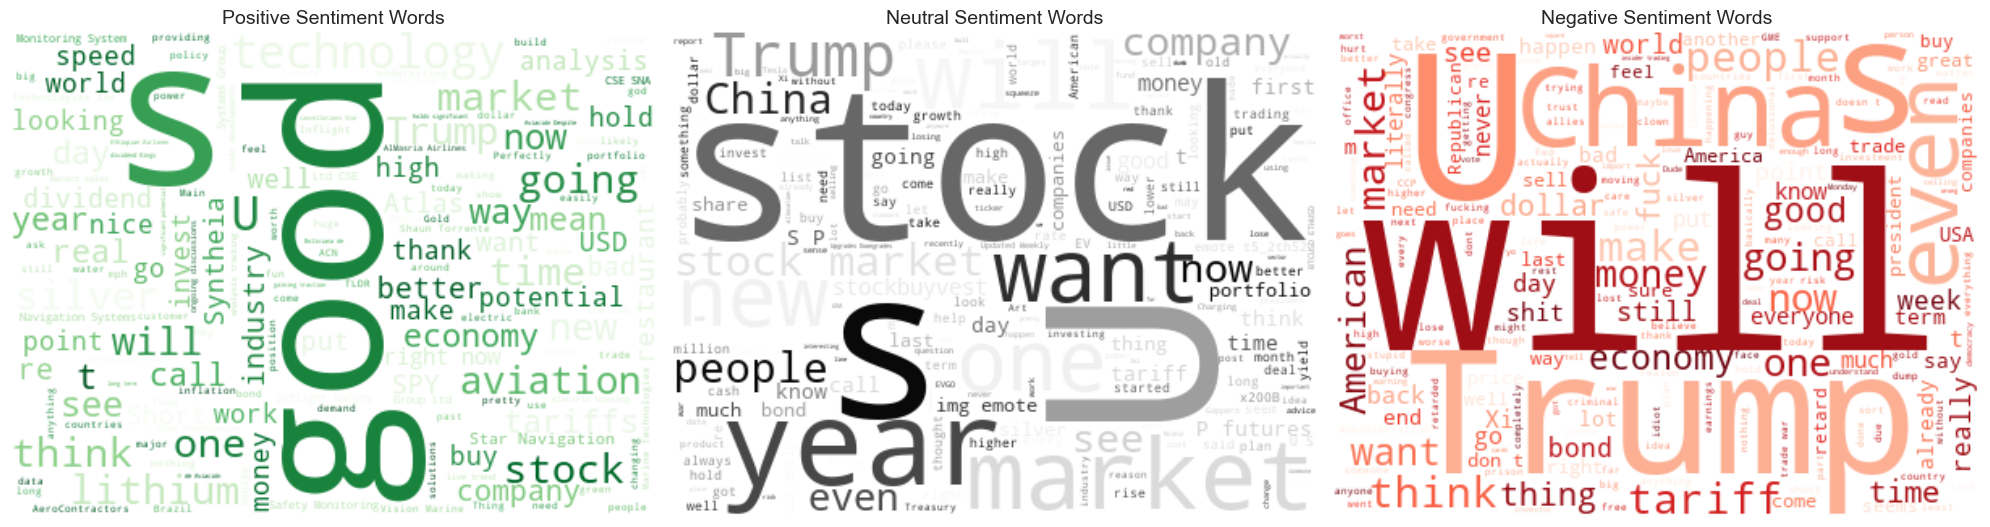

In [520]:
# Visualization 2: Word Cloud for each sentiment
from wordcloud import WordCloud

# Create df_clean from reddit_data
df_clean = reddit_data.copy()
if 'text_clean' not in df_clean.columns:
    # If you don't have a cleaned text column, use 'text'
    df_clean['text_clean'] = df_clean['text']

df_clean = df_clean.dropna(subset=['text_clean', 'label'])

# Prepare text for each sentiment class
positive_text = ' '.join(df_clean[df_clean['label'] == 1.0]['text_clean'])
neutral_text = ' '.join(df_clean[df_clean['label'] == 0.0]['text_clean'])  
negative_text = ' '.join(df_clean[df_clean['label'] == -1.0]['text_clean'])

# Create word clouds
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Positive sentiment word cloud
if positive_text.strip():
    wc_pos = WordCloud(width=400, height=300, background_color='white', colormap='Greens').generate(positive_text)
    axes[0].imshow(wc_pos, interpolation='bilinear')
    axes[0].set_title('Positive Sentiment Words', fontsize=14)
    axes[0].axis('off')

# Neutral sentiment word cloud  
if neutral_text.strip():
    wc_neu = WordCloud(width=400, height=300, background_color='white', colormap='Greys').generate(neutral_text)
    axes[1].imshow(wc_neu, interpolation='bilinear')
    axes[1].set_title('Neutral Sentiment Words', fontsize=14)
    axes[1].axis('off')

# Negative sentiment word cloud
if negative_text.strip():
    wc_neg = WordCloud(width=400, height=300, background_color='white', colormap='Reds').generate(negative_text)
    axes[2].imshow(wc_neg, interpolation='bilinear')
    axes[2].set_title('Negative Sentiment Words', fontsize=14)
    axes[2].axis('off')

plt.tight_layout()
plt.show()

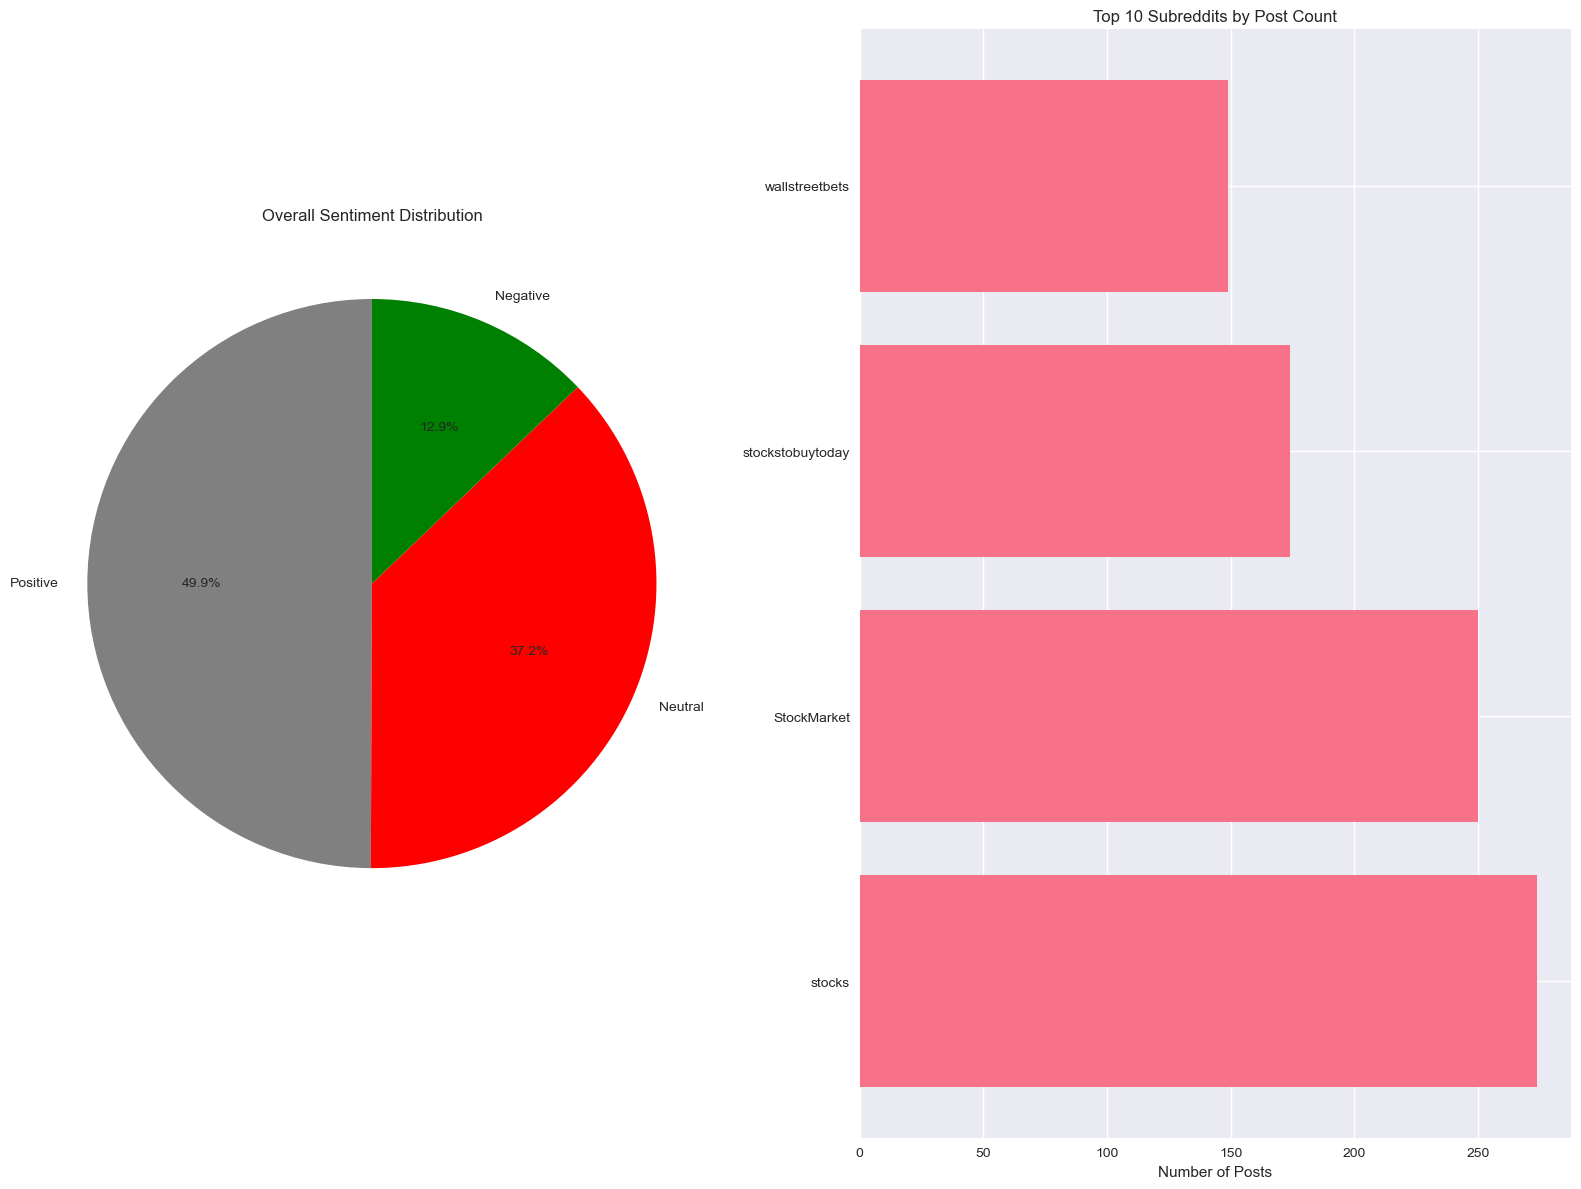

In [537]:
# Visualization 10: Sentiment Score Distribution
# Create a comprehensive dashboard-style visualization

fig, axes = plt.subplots(1, 2, figsize=(16, 12))

# 1. Sentiment count pie chart
label_counts = reddit_data['label'].value_counts()
colors = ['green' if x == 1.0 else 'gray' if x == 0.0 else 'red' for x in label_counts.index]
axes[0].pie(label_counts.values, labels=['Positive', 'Neutral', 'Negative'], 
            colors=colors, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Overall Sentiment Distribution')

# 3. Subreddit distribution (top 10)
if 'subreddit' in reddit_data.columns:
    top_subreddits = reddit_data['subreddit'].value_counts().head(10)
    axes[1].barh(range(len(top_subreddits)), top_subreddits.values)
    axes[1].set_yticks(range(len(top_subreddits)))
    axes[1].set_yticklabels(top_subreddits.index)
    axes[1].set_title('Top 10 Subreddits by Post Count')
    axes[1].set_xlabel('Number of Posts')




plt.tight_layout()
plt.show()

# Phase 2

In [518]:
### Begin Assignment Here